In [1]:
import pandas as pd
import p3
import tensorflow as tf
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras import optimizers
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from time import time
TF_CPP_MIN_LOG_LEVEL=0 #to supress warnings

# Comparing Machine Learning Models

## Creating our new Model

In [32]:
def get_model(df):
    
    #number of input neurons
    in_count = len(df.columns)-1
    
    #number of perceptrons in hidden layers
    hidden = len(df.columns)*len(df['Class'].unique())
    out = len(df['Class'].unique())

    #number of output neurons
    model = tf.keras.models.Sequential()
    
    #input layer
    model.add(tf.keras.layers.Dense(in_count))
    
    #hidden layers
    model.add(tf.keras.layers.Dense(hidden, activation=tf.nn.relu))
    model.add(tf.keras.layers.Dense(hidden, activation=tf.nn.relu))
    model.add(tf.keras.layers.Dense(hidden, activation=tf.nn.relu))
    
    #output layer
    model.add(tf.keras.layers.Dense(out, activation=tf.nn.softmax))
    
    #the optimizer
    model.compile(optimizer='adam',\
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
    
    return model

## Training and Testing the Model

In [44]:
def fit_and_evaluate(model,X_train,X_test,y_train,y_test):
    print('Training : ')
    model.fit(X_train, y_train, epochs=5)
    print('\nTesting : ')
    val_loss, val_acc = model.evaluate(X_test, y_test)
    print('\nAccuracy : {:.2f}%'.format(val_acc.item()*100,val_loss.item()))

## Testing the Model with Datasets
We'll compare the model against the others used in the lastest assigment:
+ Naive Bayes
+ Logistic Regression
+ Decision Tree

Let's start with the Votes dataset:

In [46]:
df = p3.import_data('house-votes-84.data')
X_train,y_train,X_test,y_test = p3.split_data(df)
model = get_model(df)
fit_and_evaluate(model,X_train,X_test,y_train,y_test)

Training : 
Epoch 1/5
304/304 [==============================] - 1s 3ms/sample - loss: 0.6319 - acc: 0.7928
Epoch 2/5
304/304 [==============================] - 0s 162us/sample - loss: 0.5139 - acc: 0.8750
Epoch 3/5
304/304 [==============================] - 0s 238us/sample - loss: 0.3909 - acc: 0.8882
Epoch 4/5
304/304 [==============================] - 0s 232us/sample - loss: 0.2876 - acc: 0.9046
Epoch 5/5
304/304 [==============================] - 0s 184us/sample - loss: 0.2226 - acc: 0.9243

Testing : 
131/131 [==============================] - 1s 5ms/sample - loss: 0.2196 - acc: 0.9160

Accuracy : 91.60%


Time to train is ~1.004 seconds<br>
Time to predict is ~1.005 seconds

### Comparison:<br>
* Naive Bayes:
    + Time to train: 0.003 seconds
    + Time to predict: 0.003 seconds
    + Accuracy: 90.076%
<br><br>
* Logistic Regression:
	+ Time to train: 0.003 seconds
	+ Time to predict: 0.001 seconds
	+ Accuracy: 93.130%
<br><br>
* Decision Tree:
	 + Time to train: 0.002 seconds
	 + Time to predict: 0.001 seconds
	 + Accuracy: 94.656%
<br><br>
* What can we say :  
    Even though accuracy is similar, our new model takes much more time to train and test.
    Making our model worst than the other ones.

Now, the Soccer dataset:  

In [48]:
df = p3.import_data('soccer.csv')
X_train,y_train,X_test,y_test = p3.split_data(df)
model = get_model(df)
fit_and_evaluate(model,X_train,X_test,y_train,y_test)

Training : 
Epoch 1/5
15813/15813 [==============================] - 3s 207us/sample - loss: 12.0328 - acc: 0.2535
Epoch 2/5
15813/15813 [==============================] - 2s 149us/sample - loss: 12.0328 - acc: 0.2535
Epoch 3/5
15813/15813 [==============================] - 2s 154us/sample - loss: 12.0328 - acc: 0.2535
Epoch 4/5
15813/15813 [==============================] - 2s 155us/sample - loss: 12.0328 - acc: 0.2535
Epoch 5/5
15813/15813 [==============================] - 2s 151us/sample - loss: 12.0328 - acc: 0.2535

Testing : 
6778/6778 [==============================] - 1s 202us/sample - loss: 12.0588 - acc: 0.2518

Accuracy : 25.18%


Time to train is ~11.001 seconds<br>
Time to predict is ~1.000 seconds

### Comparison:<br>
* Naive Bayes:
	+ Time to train: 0.007 seconds
	+ Time to predict: 0.003 seconds
	+ Accuracy: 43.361%
* Logistic Regression:
	+ Time to train: 1.119 seconds
	+ Time to predict: 0.002 seconds
	+ Accuracy: 45.677%
* Decision Tree:
	+ Time to train: 0.094 seconds
	+ Time to predict: 0.004 seconds
	+ Accuracy: 42.313%
* What can we say:
    + In this case, our new model is notably worst than the rest. While the other ones performed similarly in terms of accuracy, this one disappoints with only 25%. One interesting thing is that throughout the epochs the loss doesn't change, so this might be a matter of the data (which wasn't preprocessed) quality than the model itself.

In [50]:
df = p3.import_data('heart.csv')
X_train,y_train,X_test,y_test = p3.split_data(df)
model = get_model(df)
fit_and_evaluate(model,X_train,X_test,y_train,y_test)

Training : 
Epoch 1/5
211/211 [==============================] - 1s 5ms/sample - loss: 2.0159 - acc: 0.5687
Epoch 2/5
211/211 [==============================] - 0s 196us/sample - loss: 1.0341 - acc: 0.6114
Epoch 3/5
211/211 [==============================] - 0s 197us/sample - loss: 0.7317 - acc: 0.6398
Epoch 4/5
211/211 [==============================] - 0s 192us/sample - loss: 0.7466 - acc: 0.6161
Epoch 5/5
211/211 [==============================] - 0s 208us/sample - loss: 0.6322 - acc: 0.6919

Testing : 
91/91 [==============================] - 1s 8ms/sample - loss: 0.7084 - acc: 0.6813

Accuracy : 68.13%


Time to train is ~1.006 seconds<br>
Time to predict is ~1.008 seconds

### Comparison:<br>
* Naive Bayes:
	+ Time to train: 0.004 seconds
	+ Time to predict: 0.003 seconds
	+ Accuracy: 84.615%
* Logistic Regression:
	+ Time to train: 0.010 seconds
	+ Time to predict: 0.002 seconds
	+ Accuracy: 84.615%
* Decision Tree:
	+ Time to train: 0.006 seconds
	+ Time to predict: 0.002 seconds
	+ Accuracy: 80.220%
* What can we say:
    + A resemblance to the last dataset... Accuracy and times are worst. However, a few extra epochs could have improved the score significantly given that loss and accuracy were improved in every epoch. 

## Conclusion
Overall, the DNN model didn't perform as well as we thought it would. Although there may be a few reasons for that. Namely, the lack of preprocessing. The only modification to all the datasets was turning the values into numeric ones. Normalizing the data could have been the non-DNN models downfall. ALso, every dataset is small. The bigger one being the Soccer dataset with 20.000+ rows which is not much for neural nets.<br>In conclusion,
we think think that we didn't get to see neural nets true potencial with this datasets.
We can confidently say that using only one configuration of neural networks isn't the best solution. What should have been done is to check the best configuration of the network to a specific problem, maybe even train a NN to provide the best configuration of a NN given the a dataset shape (that would have been interesting to try). And in comparison with the other models, implementing neural nets is a bit harder. So for something that "just works" and is (surprisingly) easy to implement, Naive Bayes, Logistic Rgression and Decision Trees are a great choice while neural nets require tuning to get a great result.           

# Using LSTM To Predict Time-Based Values

Unfortunately, we weren't capable of comparing an LSTM model with another model. So, we'll compare different parameters (look_back and epochs) and how they change results.<br><br>We're using the code demonstrated in class that can be found at https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/.<br> The data we're using is Nike's stock price. 

In [2]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

def lstm_tester(look_back = 1,epochs = 5):
    
    # fix random seed for reproducibility
    numpy.random.seed(7)

    # load the dataset
    dataframe = read_csv('NKE.csv', usecols=[1], engine='python')
    #dataframe = dataframe.iloc[::-1]
    #dataframe = dataframe.head(670)
    dataset = dataframe.values
    dataset = dataset.astype('float32')


    # normalize the dataset
    scaler = MinMaxScaler(feature_range=(0, 1))
    dataset = scaler.fit_transform(dataset)

    # split into train and test sets
    train_size = int(len(dataset) * 0.7)
    test_size = len(dataset) - train_size
    train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

    # reshape into X=t and Y=t+1
    trainX, trainY = create_dataset(train, look_back)
    testX, testY = create_dataset(test, look_back)

    # reshape input to be [samples, time steps, features]
    trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
    testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

    # create and fit the LSTM network
    model = Sequential()
    model.add(LSTM(5, input_shape=(1, look_back)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(trainX, trainY, epochs=epochs, batch_size=1, verbose=0)

    # make predictions
    trainPredict = model.predict(trainX)
    testPredict = model.predict(testX)

    # invert predictions
    trainPredict = scaler.inverse_transform(trainPredict)
    trainY = scaler.inverse_transform([trainY])
    testPredict = scaler.inverse_transform(testPredict)
    testY = scaler.inverse_transform([testY])

    # calculate root mean squared error
    trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
    #print('Train Score: %.2f RMSE' % (trainScore))
    testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
    print('Test Score : %.2f RMSE' % (testScore),end='\t')

    # shift train predictions for plotting
    trainPredictPlot = numpy.empty_like(dataset)
    trainPredictPlot[:, :] = numpy.nan
    trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

    # shift test predictions for plotting
    testPredictPlot = numpy.empty_like(dataset)
    testPredictPlot[:, :] = numpy.nan
    testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

    # plot baseline and predictions
    fig = plt.figure(figsize=(30,10))
    plt.plot(scaler.inverse_transform(dataset))
    plt.plot(trainPredictPlot)
    plt.plot(testPredictPlot)
    #plt.show()
    return testScore,fig,plt

Test Score : 2.03 RMSE	Look_back : 1 	Epochs : 10	Time : 6.26
Test Score : 1.92 RMSE	Look_back : 1 	Epochs : 20	Time : 7.62
Test Score : 1.48 RMSE	Look_back : 1 	Epochs : 30	Time : 9.40
Test Score : 1.33 RMSE	Look_back : 1 	Epochs : 40	Time : 11.25
Test Score : 1.44 RMSE	Look_back : 1 	Epochs : 50	Time : 12.94
Test Score : 1.59 RMSE	Look_back : 2 	Epochs : 10	Time : 7.69
Test Score : 1.73 RMSE	Look_back : 2 	Epochs : 20	Time : 9.34
Test Score : 1.22 RMSE	Look_back : 2 	Epochs : 30	Time : 11.47
Test Score : 1.53 RMSE	Look_back : 2 	Epochs : 40	Time : 12.98
Test Score : 1.41 RMSE	Look_back : 2 	Epochs : 50	Time : 14.55
Test Score : 1.91 RMSE	Look_back : 3 	Epochs : 10	Time : 10.02
Test Score : 2.06 RMSE	Look_back : 3 	Epochs : 20	Time : 11.27
Test Score : 1.40 RMSE	Look_back : 3 	Epochs : 30	Time : 12.99
Test Score : 1.60 RMSE	Look_back : 3 	Epochs : 40	Time : 14.89
Test Score : 1.56 RMSE	Look_back : 3 	Epochs : 50	Time : 17.33
Test Score : 1.60 RMSE	Look_back : 4 	Epochs : 10	Time : 11.

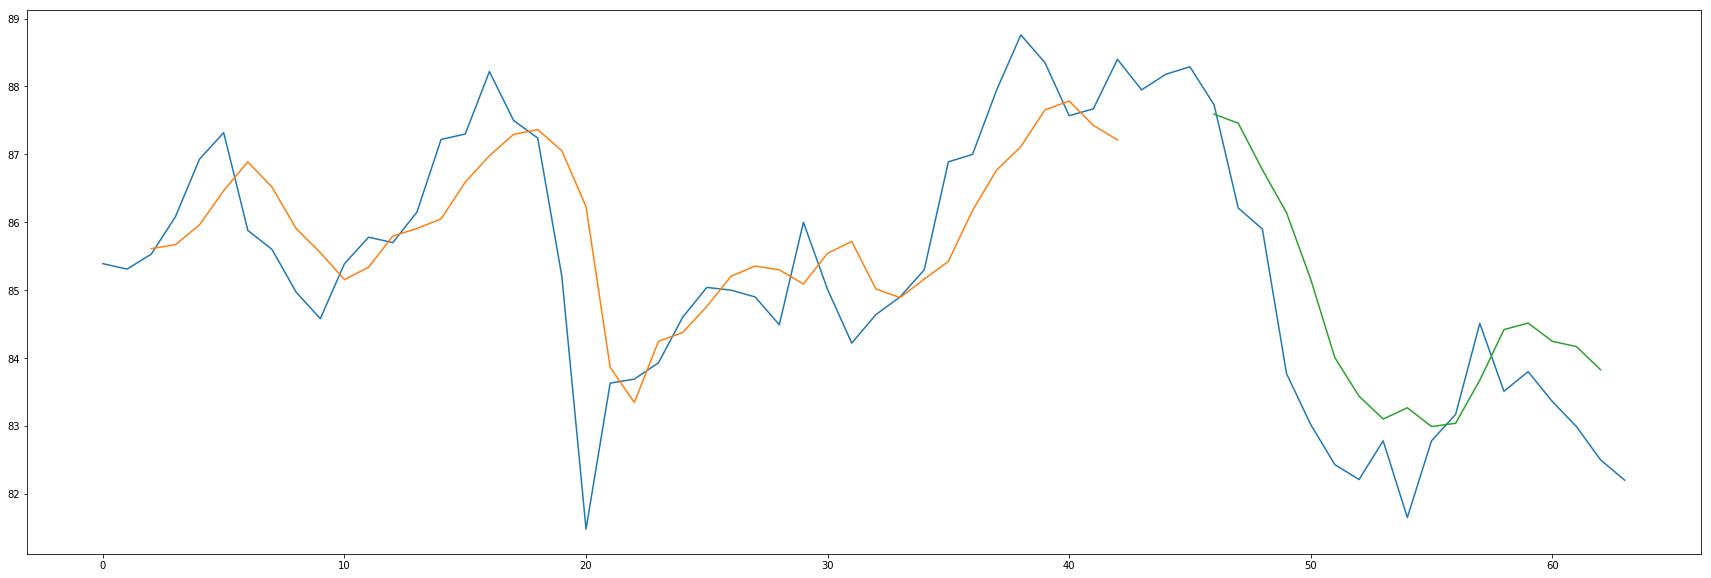

In [4]:
best_rmse = 100
best_look_back = 0
best_epoch = 0
best_fig = plt.figure(figsize=(30,10))
#look_back values from 1 to 5
for look_back in range(1,6):
    #look_back values from 10 to 50 in increments of 10
    for epoch in range(10,51,10):
        start = time()
        tmp,tmp_fig,plt = lstm_tester(look_back,epoch)
        end = time()
        print('Look_back :',look_back,'\tEpochs :',epoch,end='\t')
        print('Time : {:.2f}'.format(end-start))
        if tmp < best_rmse:
            best_rmse = tmp
            plt.close(best_fig)
            best_fig = tmp_fig
            best_look_back = look_back
            best_epoch = epoch
        else :
            plt.close(tmp_fig)
            
print('Best Parameters:')
print('\tLook Back : {}'.format(best_look_back))
print('\tEpochs : {}'.format(best_epoch))
print('Test RMSE {:.2f}'.format(best_rmse))
plt.show()

## Conclusion
As we thought, higher look back values increase time to process however, unlike we expected, our metric (Root Mean Square Error) did not improve with it. Only with 10 epochs, most of the time did the RMSE improve (except with look back = 2). It seems that more epochs could have improved the score but it would have been extremely time consuming. So, sticking to lower look backs and epochs is good enough.